In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

# Egy nagyon fontos cikk

Hogy kell a terhelést generálni illetve milyen különbségek vannak az egyes módszerekben.

https://techcommunity.microsoft.com/t5/testingspot-blog/simulating-targeted-throughput-for-load-testing-with-jmeter/ba-p/2227962

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [2]:
rt_log_file_name  = 'Logs/Load1/metric_rt_threshold2000_3000.log'
cpu_log_file_name = 'Logs/Load1/metric_cpu_threshold40_70.log'

In [3]:
df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)

df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

In [4]:
print(df_cpu.count()[0])
print(df_rt.count()[0])

56
55


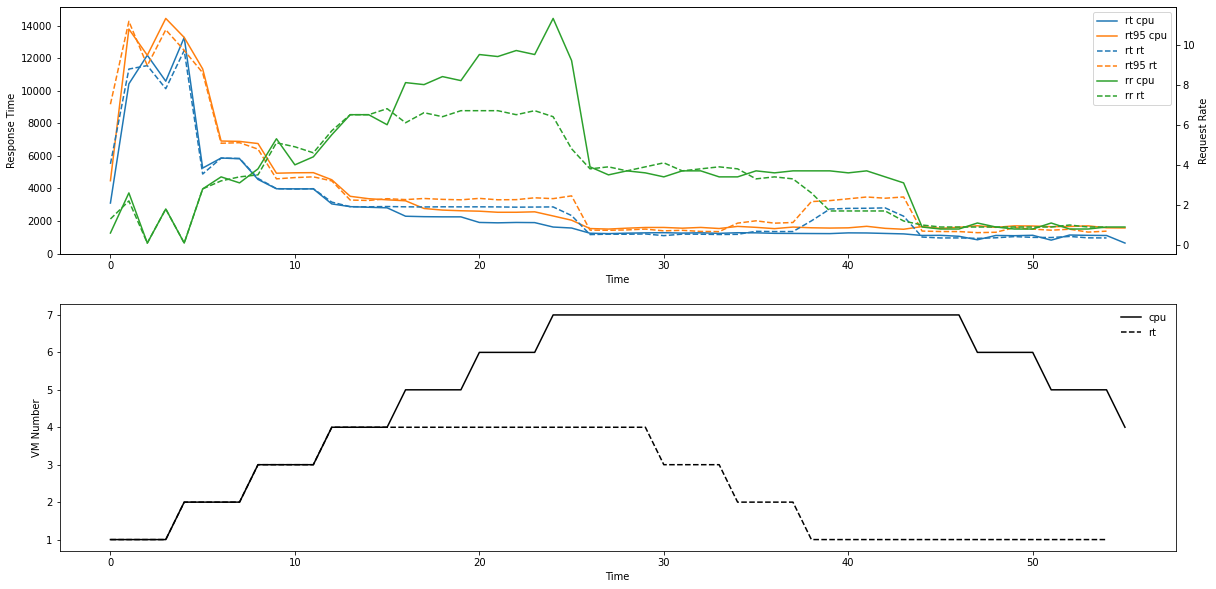

In [5]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

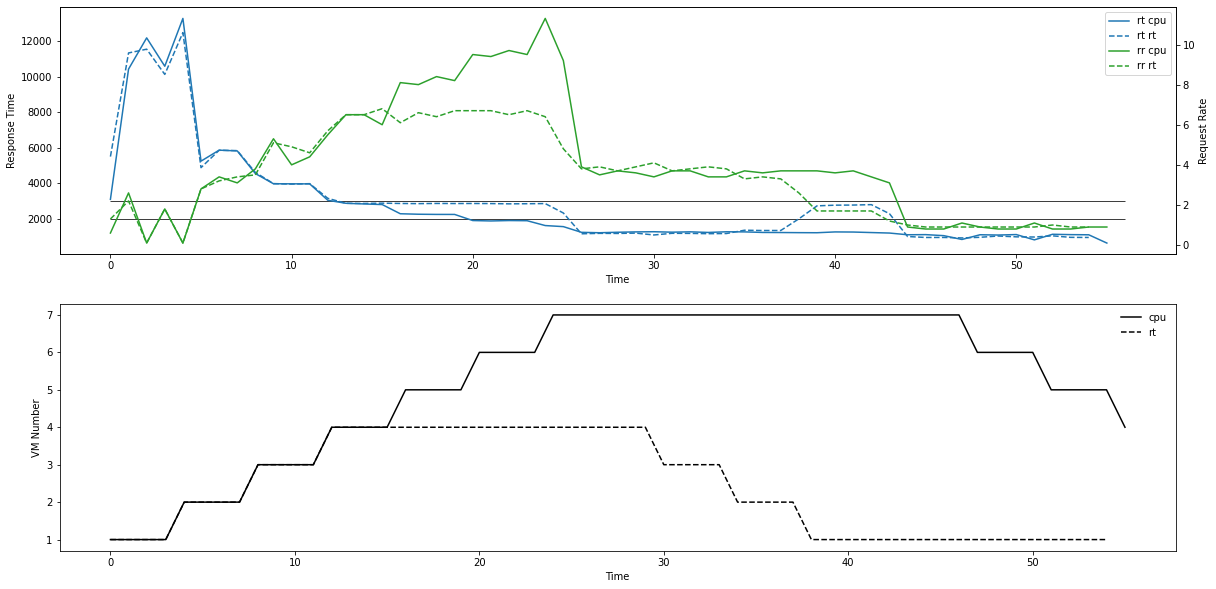

In [6]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

In [7]:
# https://towardsdatascience.com/matplotlib-styles-for-scientific-plotting-d023f74515b4

# https://github.com/garrettj403/SciencePlots

# https://pypi.org/project/SciencePlots/

In [8]:
!python -m pip install SciencePlots==1.0.9

In [9]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/ubuntu/.cache/matplotlib/tex.cache/541b94ee36e2d789f726005bb2409e9f.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 541b94ee36e2d789f726005bb2409e9f.log.




<Figure size 7200x6000 with 3 Axes>

In [10]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/ubuntu/.cache/matplotlib/tex.cache/541b94ee36e2d789f726005bb2409e9f.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 541b94ee36e2d789f726005bb2409e9f.log.




<Figure size 8400x6000 with 3 Axes>

# Egy nagyon fontos cikk

Hogy kell a terhelést generálni illetve milyen különbségek vannak az egyes módszerekben.

https://techcommunity.microsoft.com/t5/testingspot-blog/simulating-targeted-throughput-for-load-testing-with-jmeter/ba-p/2227962

```megvan a megoldás

- infititre kell állítani a loopot
- be kell állítani az időt hogy mennyi ideig tartson
- egymás alá kell rakni a threadgruppokat
- be kell állítani a testplanbe, hogy folyamatosna kövessék egymást ne párhuzamosan
- minegyik treadgruppba be kell rakni ugyan azt a kérést

- modul controlt kell elhelyezni a threadgroupban
- kívül kell elhelyezni a kivánt oldalt és a requestet a testplan alatt
```

## CPU vs Response Time új 20req/sec terheléssel

Új JMeter terhelést raktam fel mert az összes korább rossz módszert követ.

Nem volt fix a terhelési görbe, itt most már az.

In [15]:
rt_log_file_name  = 'Logs/Load2/metric_rt_threshold200_500.log'
cpu_log_file_name = 'Logs/Load2/metric_cpu_threshold40_70.log'

In [16]:
df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)

df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

In [17]:
print(df_cpu.count()[0])
print(df_rt.count()[0])

57
56


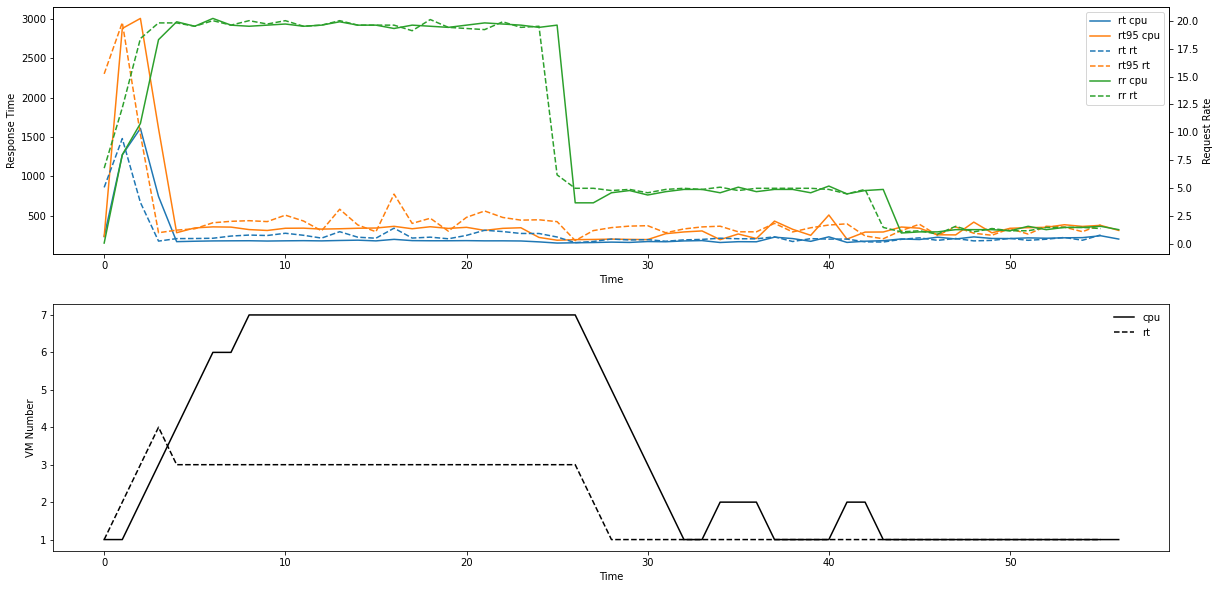

In [18]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

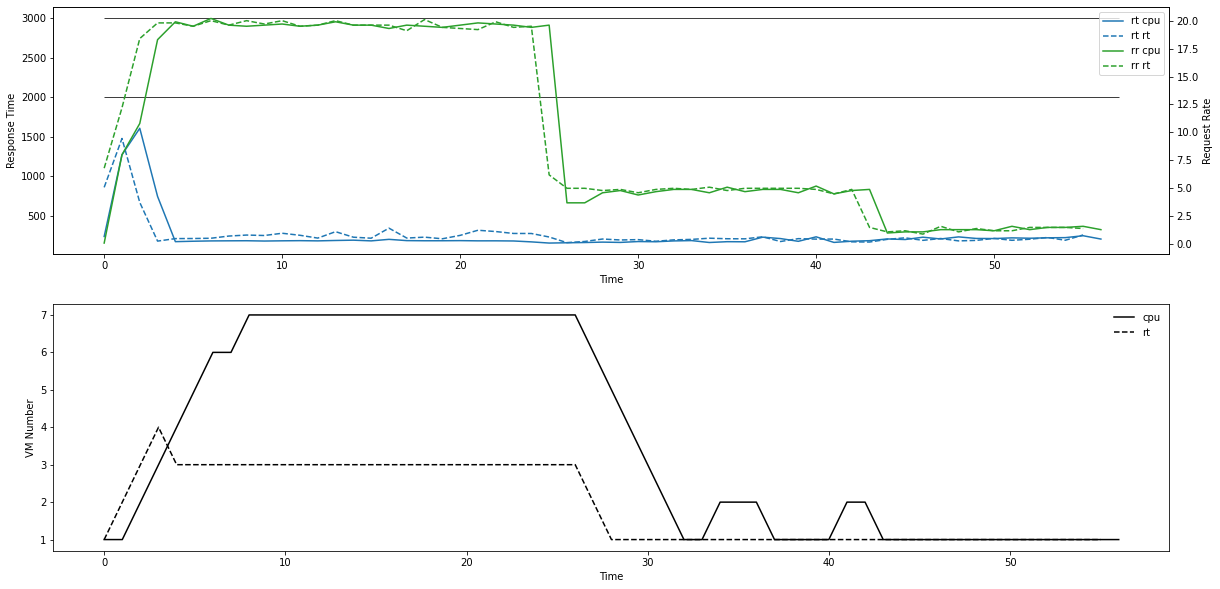

In [19]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


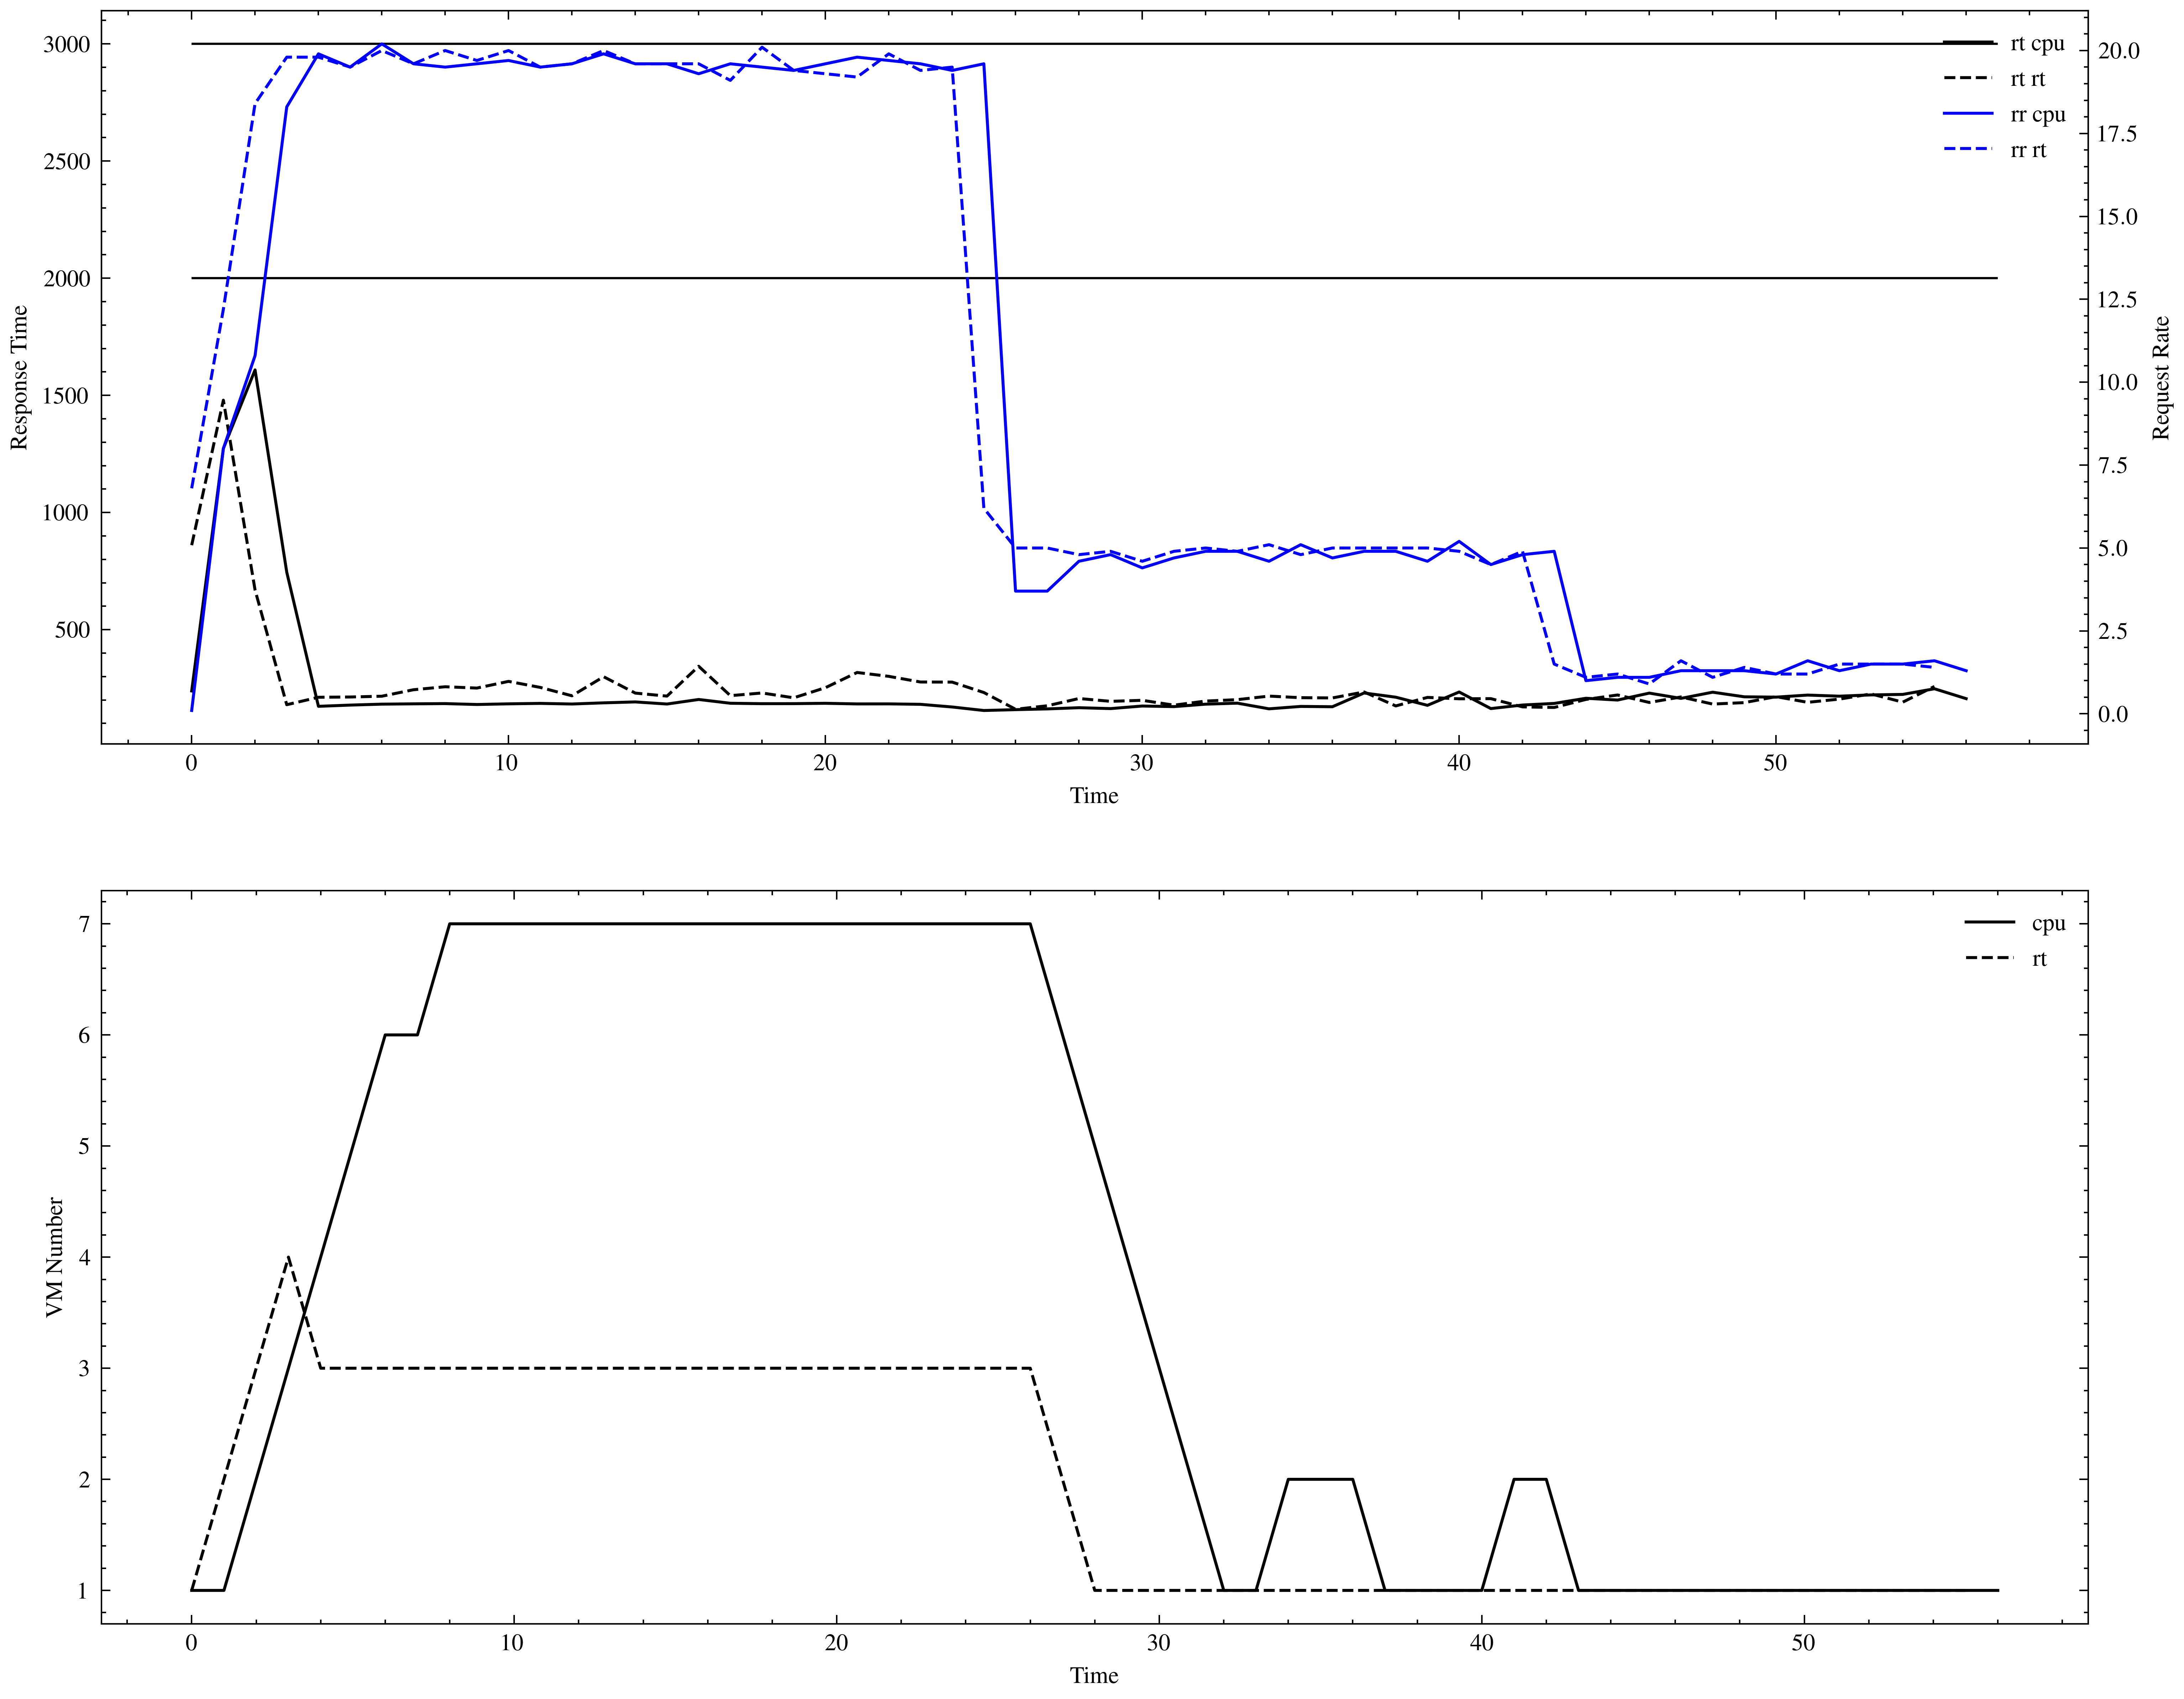

In [24]:
with plt.style.context(['science', 'ieee']):
        
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()